In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
def load_data(filename1, filename2):
    """
    Loads Flash and manufacturing data as DataFrame and and organize the dataframe
    """
    
    # read an excel file and convert into a dataframe object
    flash_df = load_flash_data(filename1)
    manufacturing_df = pd.read_excel(filename2)
                      
    # combines 2 DataFrame -> das hier es ist nicht nötig, weil man nicht eine plot von die 2 df zusammen
    # braucht sonderin ein plot für jede!!!!
    df = pd.concat([flash_df, manufacturing_df.select_dtypes(include='number')], axis=1)
    
    return flash_df, manufacturing_df, df


def load_flash_data(filename : str):
    """
    Loads flash_dataset from file
    """
    # Load data
    flash_df =pd.read_excel(filename)
    
    # insert unit in the index of each column
    flash_df.columns = [f"{col} ({unit})" for col, unit in zip(flash_df.columns, flash_df.iloc[0])]
                      
    # Dropping the row having units values
    flash_df = flash_df.drop(flash_df.index[0])

    # Reset dataframe index number
    flash_df =  flash_df.reset_index(drop=True)
    
    # Convert objects to numeric values
    flash_df = convert_objects_to_numeric(df=flash_df)
    
    return flash_df
    

def convert_objects_to_numeric(df : pd.DataFrame, cols : list = None):
    """
    Converts all columns that contain numeric values but
    but are of type "object" to floats.
    
    If the parameter cols is defined than only the given 
    columns are being considered in the transfromation.
    """
    # If all columns should be transformed
    if cols == None:
        cols = df.select_dtypes(exclude=['float']).columns
    df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
    return df


In [3]:
flash_df, manufacturing_df, df = load_data(filename1="data_flash.xlsx", filename2="data_manufacturing.xlsx")

# 2. Pair plot for the data sets flash and manufacturing
The intention of creating the pairplots is to determine which features of our data set: 
* **correlate and how the correlation cooks like**
* **The distribution of each feature:** The distribution of an attribute is shown on the respective diagonal element of the plot.

In [4]:
def create_pair_plot(df, title):
    """
    Creates pairplot for all numeric columns in input dataframe

    """
    plot_object = sns.pairplot(
        df,
        kind='reg',
        plot_kws={'line_kws':{'color':'red'}}
    )
    plot_object.fig.suptitle(title, y=1.05)
    plt.show()

### 2.1 Flash data - Pariplot

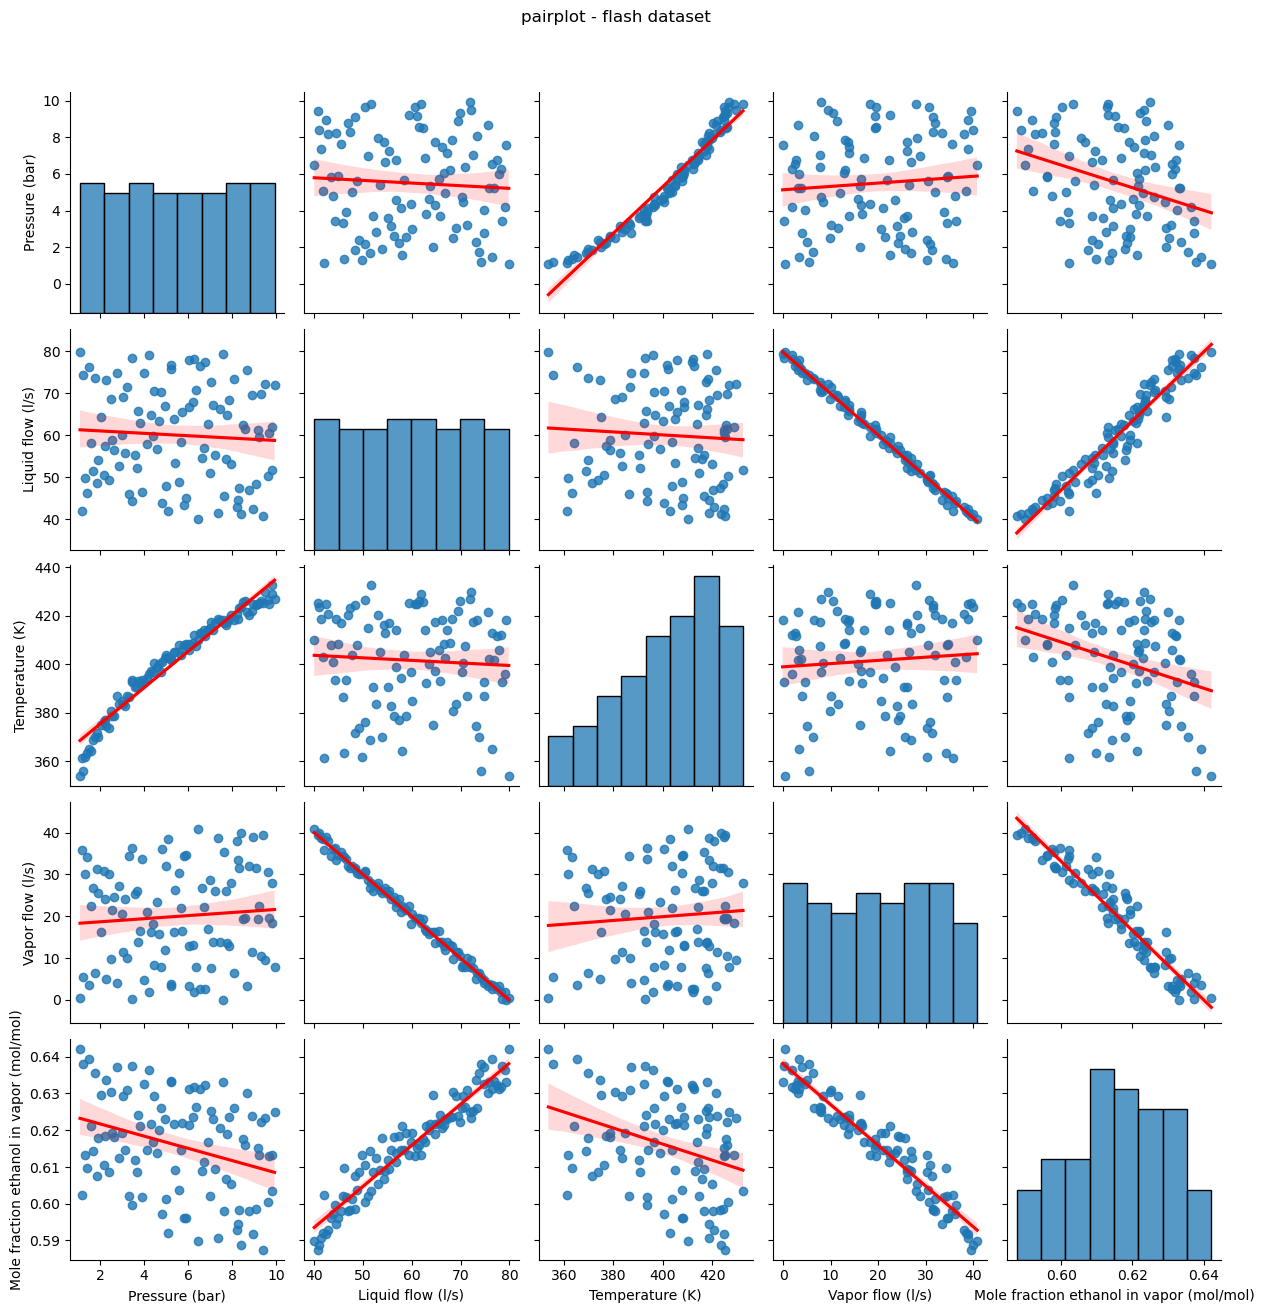

In [11]:
create_pair_plot(
    df=flash_df, 
    title="pairplot - flash dataset"
)

#### 2.1.1 Insights regarding correlations
In the above plot the following types of correlations can be determinded

**linear correlation:**
* Liquid flow <-> Vapor flow
* Liquid flow <-> Mole fraction ethanol in vapor
* Vapor flow <-> Mole fraction ethanol in vapor

**Nonlinear correlation:**
* Preassure <-> Temperature

**no correlation or weak linear correlation:** For the rest of the features show no clear correlation can be determined. This is illustraded by a regression line with a low derivative and with points that are almost equally distributed over the whole plot.

#### 2.1.2 Insights regarding Distributions
The distribution of the attribute is being indicated by the histogram of the respective diagonal element of the plot.

In the following the attributes are assinged to their estimated distribution:
* Preassure => equally distributed
* Liquid flow => equally distributed
* Vapor flow => equally distributed
* Temperature => left skewed distribution. (The histogram has a long tail on the left side)
* Mole fraction ethanol in vapor => normally distributed

### 2.2 Manufacturing data - Pariplot

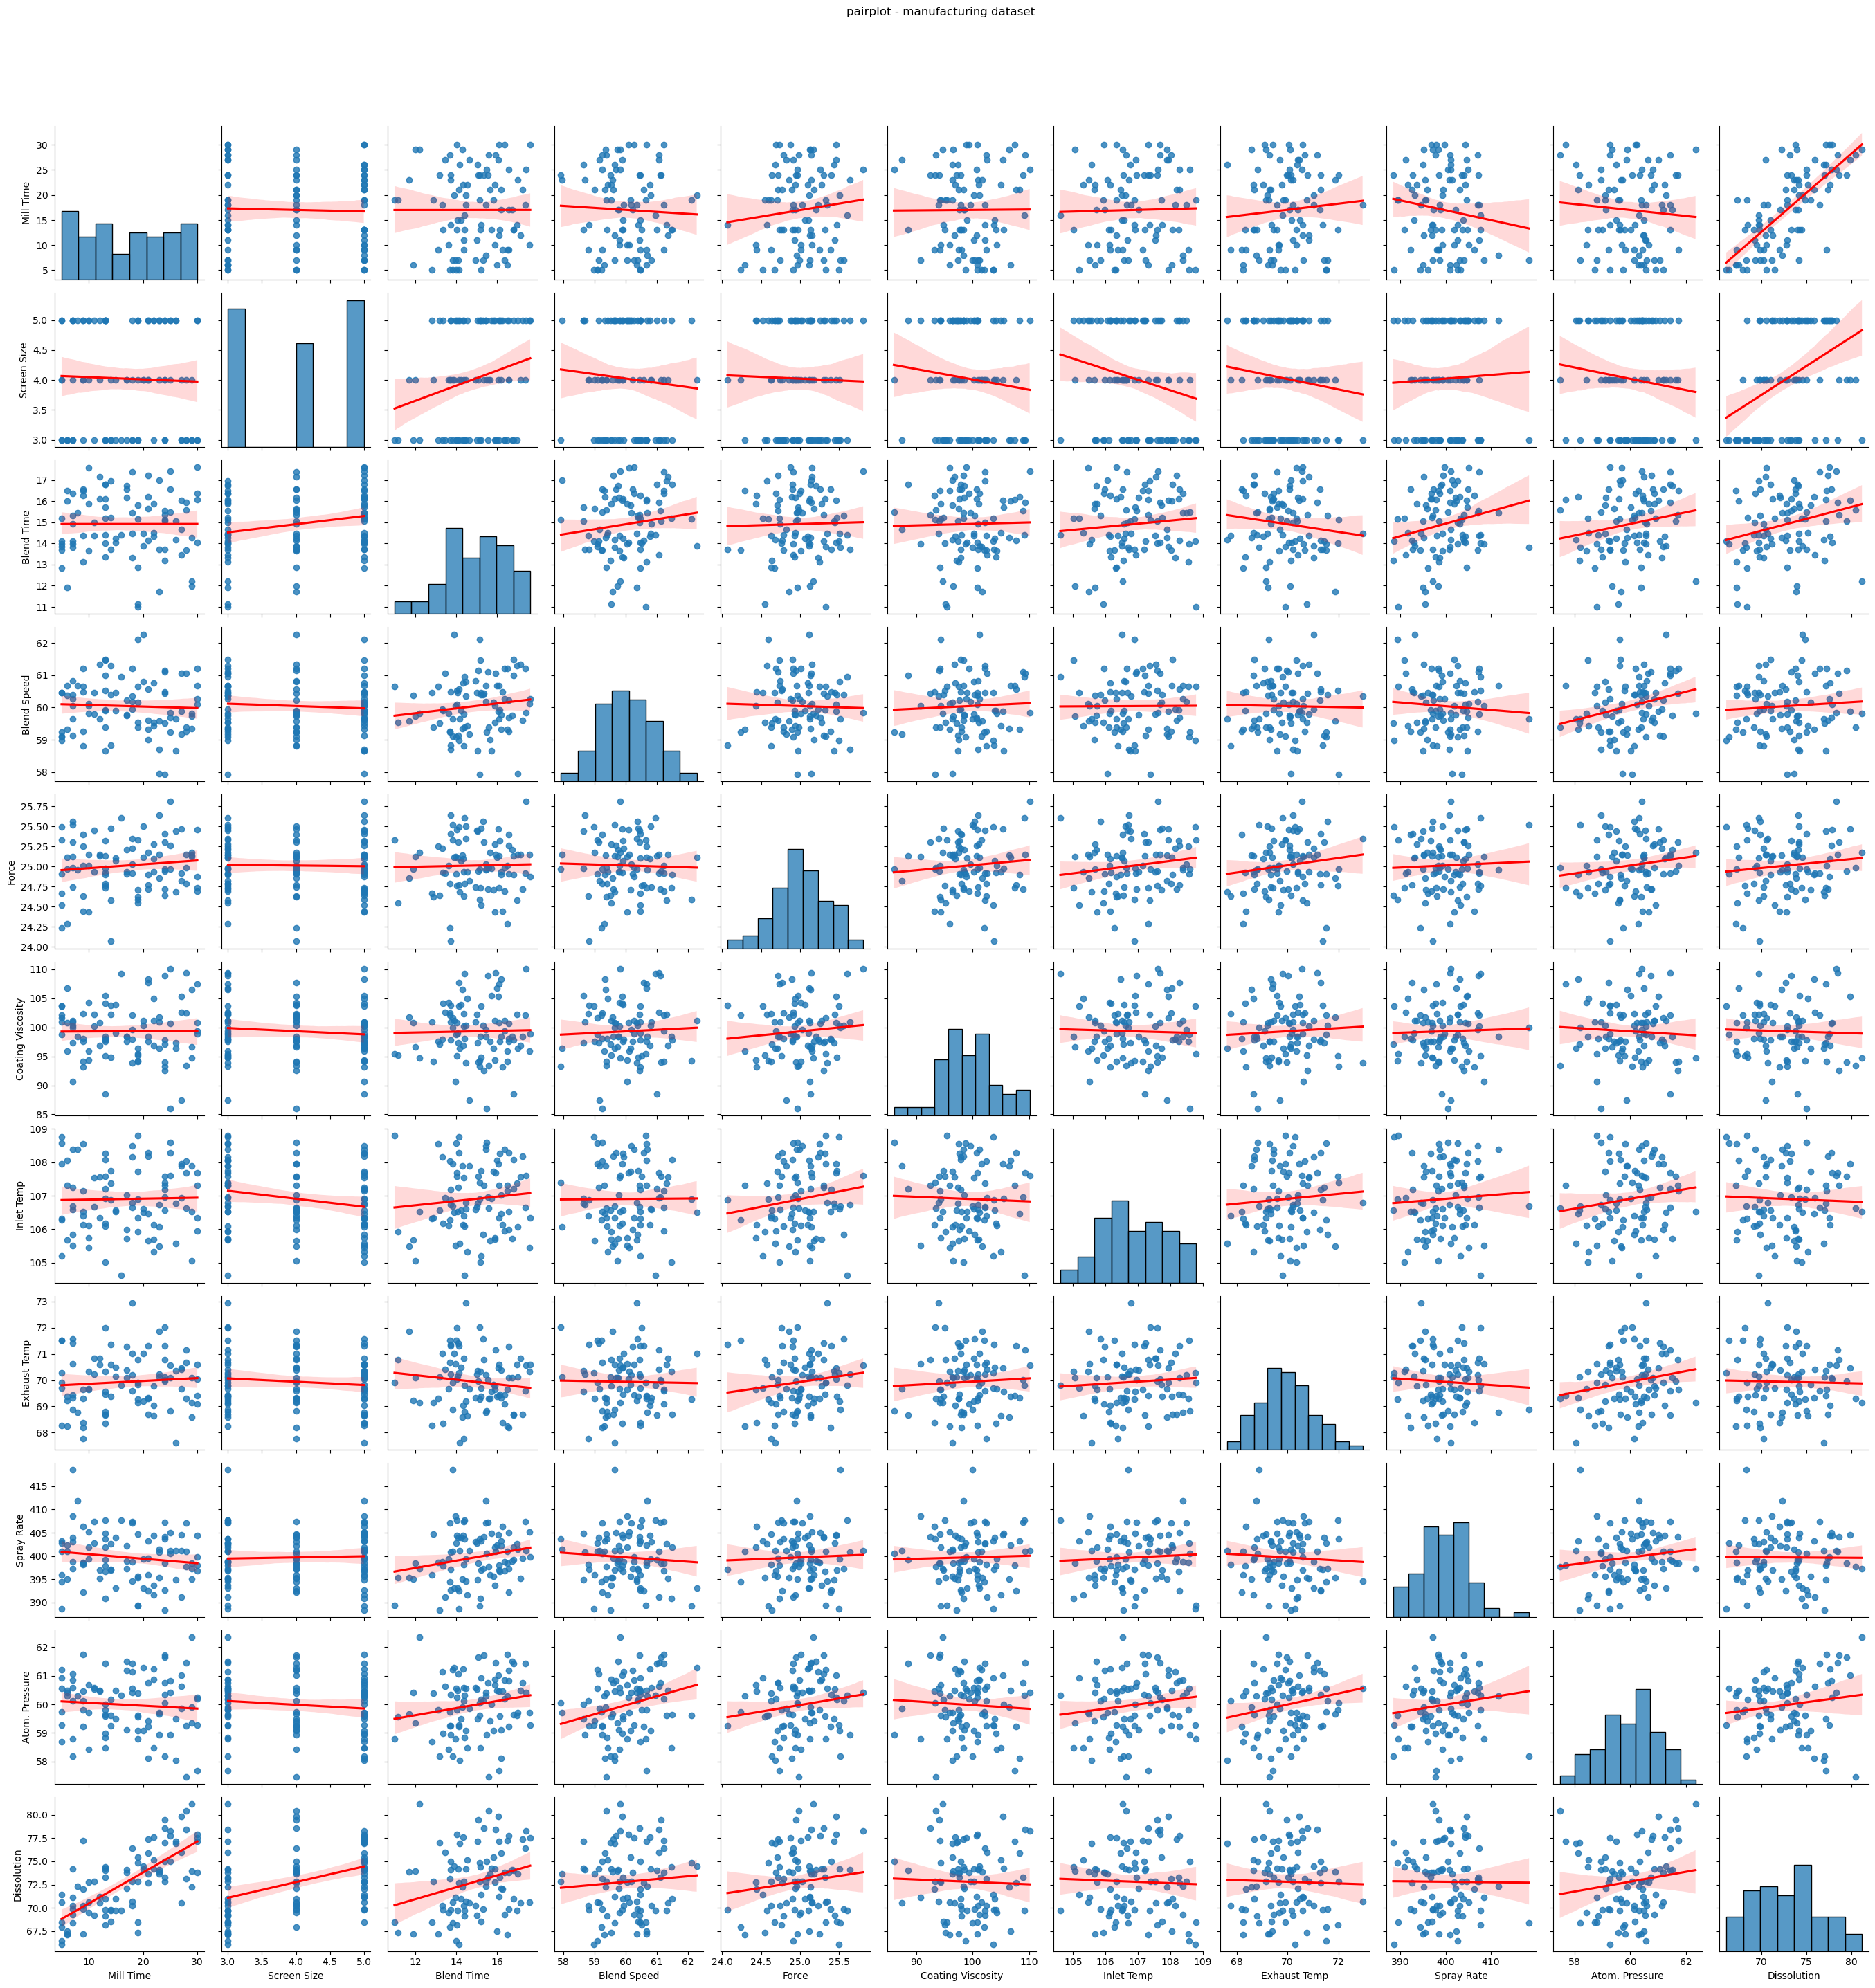

In [6]:
create_pair_plot(
    df=manufacturing_df, 
    title="pairplot - manufacturing dataset"
)

#### 2.2.1 Insights regarding correlations
In the above plot the following types of correlations can be determinded

**linear correlation:**
* Mill Time <-> Dissolution

**no correlation or weak linear correlation:** For the rest of the features show no clear orf just a weak linear correlation can be determined. This is illustraded by a regression line with a low derivative and with points that are almost equally distributed over the whole plot. There are a few attributes that seem to be linearly correlated like *Screen Size* and *Dissolution*. But it is recommendet to look at the correlation matrix in section 3.2 to get a more clear picture of the correlation.

#### 2.2.2 Insights regarding Distributions
The distribution of the attribute is being indicated by the histogram of the respective diagonal element of the plot.

In the following the attributes are assinged to their estimated distribution:
* Mill Time => equally distributed
* Screen Size => equally distributed
* Blend Time => close to normal like distribution with tendence of being left skewed
* Blend Speed  => close to normal like distribution
* Force  => close to normal like distribution
* Coating Viscosity => close to normal like distribution
* Inlet Temp => unclear
* Exhaust Temp => close to normal like distribution with tendence of being right skewed
* Spray Rate => close to normal like distribution
* Atom. Pressure => close to normal like distribution
* Dissolution => unclear

# 3. correlation matrix (pearson correlation) for the data sets flash and manufacturing
The Pearson's correlation coefficient is a measure of the linear association between two attributes. It has a value between -1 and 1:
* -1 => a perfectly negative linear correlation between the two attributes.
* 0 => no linear correlation between two attributes
* 1 => a perfectly positive linear correlation between the two attributes

### 3.1 flash data

In [7]:
corr_matrix_flash = flash_df.corr(method='pearson')

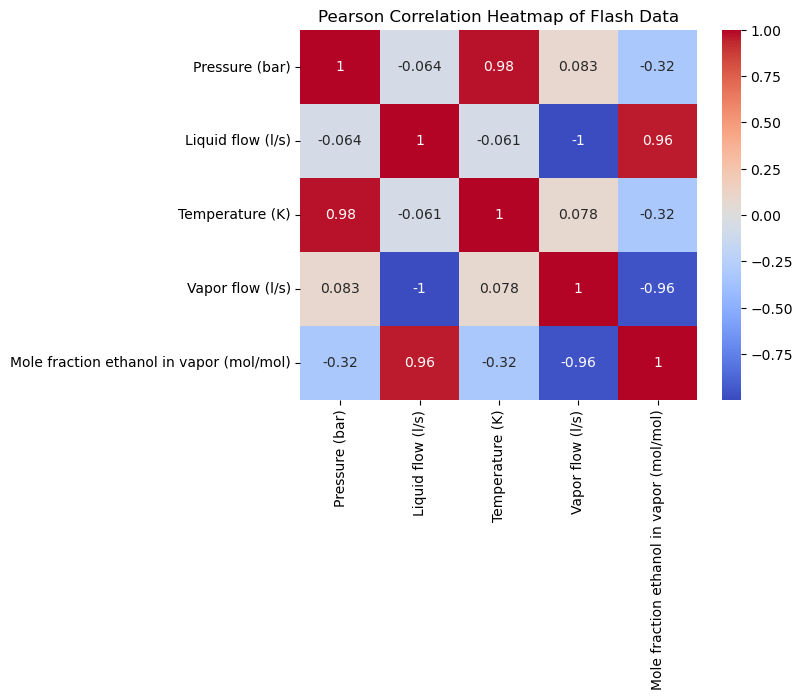

In [8]:
sns.heatmap(corr_matrix_flash, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap of Flash Data')
plt.show()

In the above correlation matrix the insights from the pair plot are being enforced. All the **positive correlated** attributes attributes are marked in **dark red**. And all the **negative correlated** attributes attributes are marked in **dark blue**.

It is importand to do not consider the diagonal elements of the matrix in the above explanation which represents the correlation with itself. By nature this correlation should be perfect but is not useful for interpretation.

### 3.2 manufacturing data set

In [20]:
corr_matrix_manufacturing = manufacturing_df.corr(method='pearson')
print(np.round(corr_matrix_manufacturing, 2))

                   Mill Time  Screen Size  Blend Time  Blend Speed  Force  \
Mill Time               1.00        -0.03        0.00        -0.04   0.11   
Screen Size            -0.03         1.00        0.22        -0.07  -0.02   
Blend Time              0.00         0.22        1.00         0.13   0.02   
Blend Speed            -0.04        -0.07        0.13         1.00  -0.03   
Force                   0.11        -0.02        0.02        -0.03   1.00   
Coating Viscosity       0.01        -0.10        0.02         0.05   0.09   
Inlet Temp              0.02        -0.21        0.10         0.01   0.15   
Exhaust Temp            0.08        -0.10       -0.13        -0.02   0.14   
Spray Rate             -0.14         0.04        0.21        -0.07   0.04   
Atom. Pressure         -0.08        -0.11        0.18         0.26   0.15   
Dissolution             0.72         0.40        0.27         0.07   0.12   

                   Coating Viscosity  Inlet Temp  Exhaust Temp  Spray Rate 

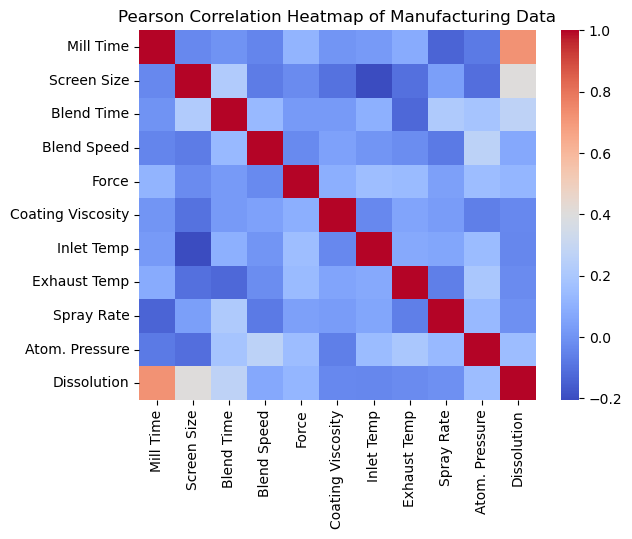

In [10]:
sns.heatmap(corr_matrix_manufacturing, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap of Manufacturing Data')
plt.show()

In the above correlation matrix the insights from the pair plot are being enforced. We can find a few weakly correlated attributes like e.g. *Screen Size* and *Blend Time* with a Pearson correlation coefficient (PCC) of 0.22, but most of the attributes are not correlated. The only attributes with a high correlation coefficient are:
* Mill Time <-> Dissolution (PCC = 0.72)
* Screen Size <-> Dissolution (PCC = 0.4)

It is importand to do not consider the diagonal elements of the matrix in the above explanation which represents the correlation with itself. By nature this correlation should be perfect but is not useful for interpretation.